# Exercise

We will work with a star catalogue of 240 stars described by the following information:

- Temperature (in Kelvin).
- Luminosity (L/Lo).
- Radius (R/Ro).
- Absolute magnitude (Mv).

We also have the following data for each star:

- Color (Red/Orange/Yellow/White/Blue).
- Spectral class ('A', 'B', 'F', 'G', 'K', 'M', 'O').
- Star type (Brown dwarf/Red dwarf/White dwarf/Main sequence star/Supergiant/Hypergiant).

In [1]:
import urllib.request
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
import sklearn

`pandas` and `seaborn`, which are popular python packages, are similar to `numpy` and `matplotlib`, but newer.

In [2]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/nshaud/ml_for_astro/main/stars.csv", "stars.csv")
df_stars = pd.read_csv("stars.csv")

In [3]:
df_stars

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,Brown Dwarf,Red,M
1,3042,0.000500,0.1542,16.60,Brown Dwarf,Red,M
2,2600,0.000300,0.1020,18.70,Brown Dwarf,Red,M
3,2800,0.000200,0.1600,16.65,Brown Dwarf,Red,M
4,1939,0.000138,0.1030,20.06,Brown Dwarf,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Hypergiant,Blue,O
236,30839,834042.000000,1194.0000,-10.63,Hypergiant,Blue,O
237,8829,537493.000000,1423.0000,-10.73,Hypergiant,White,A
238,9235,404940.000000,1112.0000,-11.23,Hypergiant,White,A


In [4]:
le = LabelEncoder()

# Assign unique integers from 0 to 6 to each star type
df_stars['Star type'] = le.fit_transform(df_stars['Star type'])
labels = le.inverse_transform(df_stars['Star type'])
class_names = le.classes_

print(class_names)

['Brown Dwarf' 'Hypergiant' 'Main Sequence' 'Red Dwarf' 'Supergiant'
 'White Dwarf']


It is often grood practice to start with a statistical analysis of the dataset to answer the following questions:
* are there any missing values?
* are there NaNs in the data?

Star classification is something that can be done based on rules depending on temperature and luminosity. For example, Wikipedia gives the following example of a Hertzsprung-Russell diagram:
![](https://upload.wikimedia.org/wikipedia/commons/6/6b/HRDiagram.png)

We can reproduce this diagram by plotting the scatter plot of our stars using the same variables in log-log-scale.

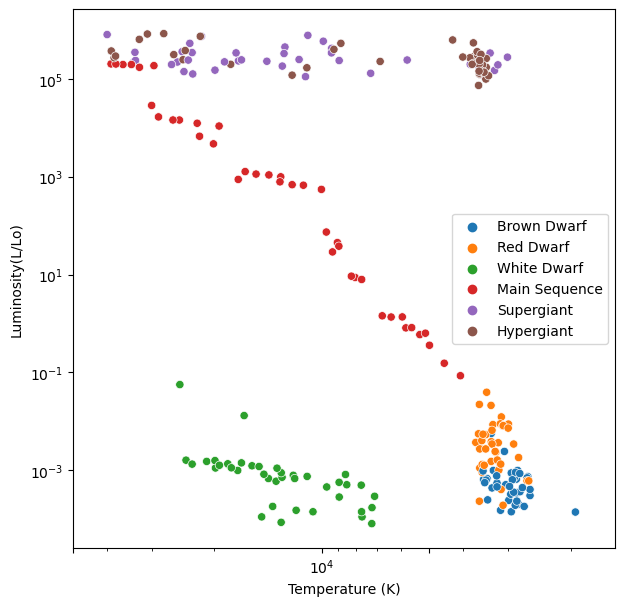

In [5]:
fig = plt.figure(figsize=(7, 7))
sns.scatterplot(data=df_stars, x='Temperature (K)', y='Luminosity(L/Lo)', hue=labels)

plt.xscale('log')
plt.yscale('log')
plt.xticks([5000, 10000, 50000])
plt.xlim(5e4, 1.5e3)
plt.show()

We find the same organization of stars in this 2D plane. Main Sequence stars and White Dwarves are fairly easy to isolate from the rest: a statistical model should be able to easily classify them. Based only on Luminosity and Temperature, Dwarf stars and Giant stars have higher intra-group variability: Supergiant and Hypergiant cover the same space (same for Brown and Red Dwarves). Additionnal variables might be needed to correctly identify the types of those stars.

- Apply PCA to the dataset at your disposa (hint: don't use columns with labels, only those with real numbers).
- Project the dataset into the principal components, and do a scatter plot of the first two. 
- This will look terrible. Think about the units!
- Explore what happens if you rescale the data first.

Now:

- You can try a linear, affine transformation such that each dimension goes between -1 and 1.
- Or (which is [the usual machine-learning approach](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)) standardize your data such that each dimension has mean=0 and variance=1. 
- Redo your PCA. Should be much much better.
- How much variance is explained by those two components?


### For later: come back to this assignment after lecture 20

- Now run a supervised classification algorithm on this dataset. 
- Can you predict the stellar type? How well? Careful with overfitting of course.

##### PCA

First of all, I initialize the PCA function and I select the columns with real numbers for my analysis (I do not consider the ones with labels), and I save it in the array $stars$. Consequently, I fit the array $stars$ with the PCA function and I obtain the corresponding reduced array $NewStars$.

In [6]:
pca = PCA()

stars = np.array(df_stars.drop(columns=['Star color', 'Star type', 'Spectral Class']))
pca.fit(stars)

NewStars = pca.transform(stars)

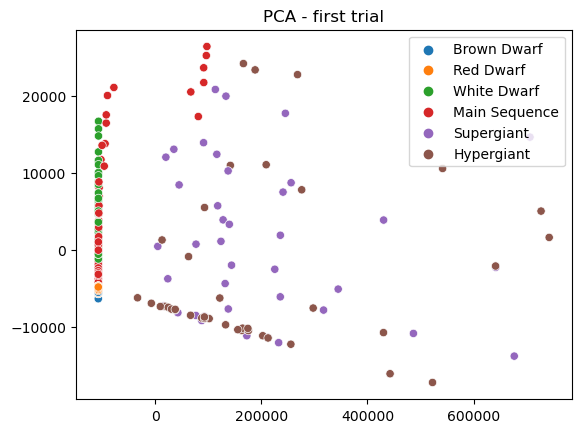

In [7]:
# 'NewStars' is the new 'stars' reduced in 4D, therefore it has four columns (I want to plot the first two)
sns.scatterplot(x=NewStars[:, 0], y=NewStars[:, 1], hue=labels)
plt.title('PCA - first trial')
plt.show()

Standardization is important in PCA because, without it, variables with a wider range of values (or different units) would have a greater influence on the calculation of the principal components. PCA is sensitive to the scales of the variables.

With standardization, I scale the values so that they all have $0$ mean and $1$ as standard deviation.

In [8]:
scaler = StandardScaler()
stars2 = scaler.fit_transform(df_stars.drop(columns=['Star color', 'Star type', 'Spectral Class']))

pca2 = PCA()
pca2.fit(stars2)

NewStars2 = pca2.transform(stars2)

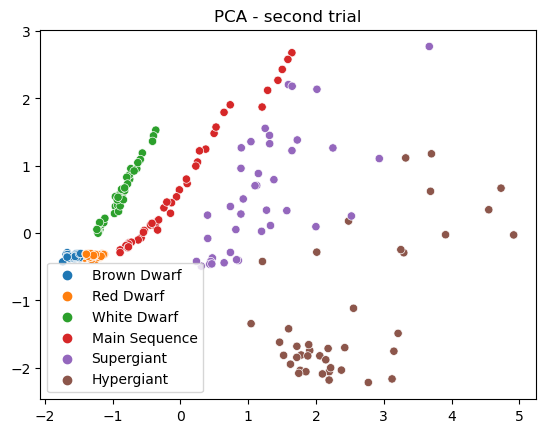

In [9]:
sns.scatterplot(x=NewStars2[:, 0], y=NewStars2[:, 1], hue=labels)
plt.title('PCA - second trial')
plt.show()

To compare the two results, I plot the corresponding explained variance ratios.

In [10]:
variance = np.array(pca.explained_variance_ratio_)
variance2 = np.array(pca2.explained_variance_ratio_)

print(f'Explained variances for the first trial: {variance}')
print(f'Explained variances for the second trial: {variance2}')

Explained variances for the first trial: [9.97606313e-01 2.38789920e-03 5.78677260e-06 1.34274189e-09]
Explained variances for the second trial: [0.60357391 0.23500784 0.09329645 0.0681218 ]


In [11]:
print('Without standardization')

for i in range(0, len(variance)):
    print(f'Percentage for the component {i+1}: {100*variance[i]:.2f}%')

print('\n')
print('With standardization')

for j in range(0, len(variance2)):
    print(f'Percentage for the component {j+1}: {100*variance2[j]:.2f}%')

Without standardization
Percentage for the component 1: 99.76%
Percentage for the component 2: 0.24%
Percentage for the component 3: 0.00%
Percentage for the component 4: 0.00%


With standardization
Percentage for the component 1: 60.36%
Percentage for the component 2: 23.50%
Percentage for the component 3: 9.33%
Percentage for the component 4: 6.81%


### For later: come back to this assignment after lecture 20

- Now run a supervised classification algorithm on this dataset. 
- Can you predict the stellar type? How well? Careful with overfitting of course.

In [12]:
np.unique(labels)

array(['Brown Dwarf', 'Hypergiant', 'Main Sequence', 'Red Dwarf',
       'Supergiant', 'White Dwarf'], dtype=object)

In [13]:
newLabels = []

for k in range(0, len(labels)):
    if labels[k]=='Brown Dwarf':
        newLabels.append(0)
    if labels[k]=='Hypergiant':
        newLabels.append(1)
    if labels[k]=='Main Sequence':
        newLabels.append(2)
    if labels[k]=='Red Dwarf':
        newLabels.append(3)
    if labels[k]=='Supergiant':
        newLabels.append(4)
    if labels[k]=='White Dwarf':
        newLabels.append(5)

newLabels = np.array(newLabels)

In [14]:
np.unique(newLabels)

array([0, 1, 2, 3, 4, 5])

In [15]:
X = np.copy(NewStars2)
y = np.copy(newLabels)

X_train, X_val, y_train, y_val = sklearn.model_selection.train_test_split(X, y, test_size=0.30, random_state=42)

In [16]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred_gnb = gnb.predict(X_val)
yProb_gnb = gnb.predict_proba(X_val)[:, 1]

In [17]:
conf_matrix = sklearn.metrics.confusion_matrix(y_val, y_pred_gnb)

print(conf_matrix)

[[14  0  0  0  0  0]
 [ 0 14  1  0  0  0]
 [ 0  0  9  0  1  0]
 [ 1  0  0 11  0  0]
 [ 0  1  1  0  9  0]
 [ 0  0  0  0  0 10]]


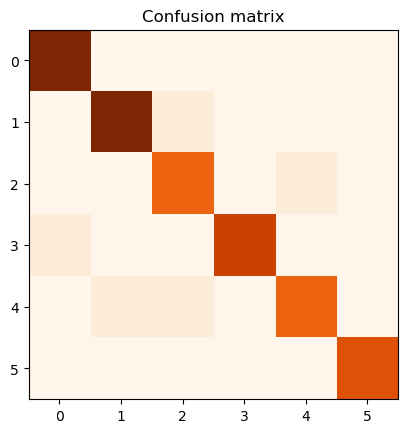

In [18]:
plt.imshow(conf_matrix, cmap='Oranges', interpolation='nearest')
plt.title('Confusion matrix')
plt.show()